<a href="https://colab.research.google.com/github/Jay-Patankar/Car-price-prediction/blob/main/carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as  pd
import matplotlib.pyplot as plt
import io
from google.colab import files

uploaded=files.upload()

Saving Car details v3.csv to Car details v3.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded["Car details v3.csv"]))

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
len(df.columns)

13

**knowing more about the individual columns and their datatypes**

In [6]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
type(df.iloc[0]['mileage'])

str

**Here year has been used as a measure of how old the car is to predict the selling price. It is obtained by subtracting the manufacturing year from the present year ie 2022.**

In [9]:
df['year']=2022-df['year']
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,8,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,12,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,15,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,9,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,15,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,13,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,9,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Checking for nans in columns**

In [10]:
for c in df.columns:
  print(c,end=" ")
  print(df[c].isnull().sum())

name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
mileage 221
engine 221
max_power 215
torque 222
seats 221


**As columns like mileage and power are crucial to determine the target variable.....rows containing Nans have simply been dropped instead of imputing them with aggregate values**

In [11]:
df.dropna(subset=["mileage","engine","max_power","torque","seats"],inplace=True)

In [12]:
df.shape

(7906, 13)

**mileage , maxpower and engine capacity have alphanumeric values . These are converted to float / int for further processing**

In [13]:
newcol=[]
for i in range(len(df)):
  
  val=df.iloc[i]['mileage']

  u=len(val)*-1
  if '/' in val:
      val=val[-6:u-1:-1][::-1]
  else:
      val=val[-5:u-1:-1][::-1]
  newcol.append(val)
df["Mlg"]=newcol

In [14]:
newcol2=[]
for i in range(len(df)):
  
  val=df.iloc[i]['engine']

  u=len(val)*-1
 
 
  val=val[-3:u-1:-1][::-1]
  newcol2.append(int(val))
print(newcol2)
df["Engine"]=newcol2
del df['engine']

[1248, 1498, 1497, 1396, 1298, 1197, 1061, 796, 1364, 1399, 1461, 993, 1248, 1061, 1198, 1248, 1396, 796, 1396, 1461, 1498, 1248, 1248, 1199, 1197, 796, 1248, 1061, 796, 1248, 796, 1197, 1248, 796, 998, 1591, 1198, 2179, 796, 1368, 1497, 1497, 1197, 1248, 998, 2982, 2494, 2143, 1498, 2477, 1498, 1462, 1498, 2755, 2494, 1968, 1798, 1968, 2143, 1248, 1197, 1396, 1248, 1196, 1197, 1498, 1498, 998, 1498, 1248, 1248, 1197, 1248, 2982, 1248, 1373, 1598, 2494, 1498, 1998, 998, 1198, 796, 796, 1086, 796, 998, 1198, 1086, 1598, 998, 1197, 1248, 1197, 796, 1396, 998, 1248, 1197, 1196, 1197, 2179, 1194, 1591, 1798, 1172, 2179, 1405, 1582, 1396, 1798, 998, 1248, 1197, 998, 1461, 1582, 1498, 1248, 999, 998, 796, 1248, 1086, 1248, 1198, 1968, 2487, 1999, 3604, 1999, 2987, 1995, 1995, 1798, 2143, 1451, 1497, 1798, 1969, 2967, 1248, 2987, 2497, 1797, 1999, 1198, 1598, 1797, 1598, 1991, 1373, 1991, 1497, 1197, 998, 1197, 2755, 1497, 1995, 2494, 1995, 2362, 1373, 1969, 1598, 1196, 1399, 1197, 998, 1197,

In [15]:
newcol3=[]
for i in range(len(df)):
  
  val=df.iloc[i]['max_power']

  u=len(val)*-1
 
 
  val=val[-4:u-1:-1][::-1]
  newcol3.append(float(val))
print(newcol3)
df["Maxpower"]=newcol3
del df['max_power']

[74.0, 103.52, 78.0, 90.0, 88.2, 81.86, 57.5, 37.0, 67.1, 68.1, 108.45, 60.0, 73.9, 67.0, 82.0, 88.5, 90.0, 46.3, 88.73, 64.1, 98.6, 74.0, 88.8, 83.81, 83.1, 47.3, 73.8, 67.0, 34.2, 88.5, 35.0, 81.83, 88.5, 40.3, 67.1, 121.3, 67.0, 138.03, 37.0, 160.77, 117.3, 116.3, 83.14, 88.5, 67.05, 168.5, 100.0, 120.7, 98.63, 175.56, 98.6, 103.25, 98.6, 171.5, 100.6, 174.33, 138.03, 187.74, 170.0, 88.8, 78.9, 88.76, 74.0, 86.8, 83.1, 108.495, 98.6, 67.0, 108.62, 88.5, 88.5, 78.9, 74.0, 168.5, 74.0, 93.7, 103.6, 100.6, 98.59, 189.0, 67.04, 67.05, 47.3, 47.3, 68.05, 35.0, 58.2, 74.0, 68.05, 103.6, 67.1, 82.85, 74.0, 82.0, 46.3, 88.73, 67.05, 90.0, 81.8, 73.0, 83.1, 120.0, 94.68, 121.3, 160.0, 65.0, 155.0, 69.01, 126.32, 88.76, 138.1, 67.04, 88.5, 83.14, 67.04, 83.8, 126.2, 98.96, 73.9, 67.0, 67.04, 46.3, 88.76, 62.1, 88.76, 86.7, 188.0, 214.56, 177.0, 280.0, 148.31, 254.79, 187.74, 190.0, 177.46, 204.0, 141.0, 117.6, 138.03, 190.0, 241.4, 88.5, 282.0, 150.0, 147.5, 177.0, 108.5, 103.6, 147.5, 103.5,

In [16]:


df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,Mlg,Engine,Maxpower
0,Maruti Swift Dzire VDI,8,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,190Nm@ 2000rpm,5.0,23.4,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52
2,Honda City 2017-2020 EXi,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78.00
3,Hyundai i20 Sportz Diesel,12,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90.00
4,Maruti Swift VXI BSIII,15,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.20
5,Hyundai Xcent 1.2 VTVT E Plus,5,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,113.75nm@ 4000rpm,5.0,20.14,1197,81.86
6,Maruti Wagon R LXI DUO BSIII,15,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,"7.8@ 4,500(kgm@ rpm)",5.0,17.3,1061,57.50
7,Maruti 800 DX BSII,21,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,59Nm@ 2500rpm,4.0,16.1,796,37.00
8,Toyota Etios VXD,11,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,170Nm@ 1800-2400rpm,5.0,23.59,1364,67.10
9,Ford Figo Diesel Celebration Edition,9,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,160Nm@ 2000rpm,5.0,20.0,1399,68.10


In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,Mlg,Engine,Maxpower
0,Maruti Swift Dzire VDI,8,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,190Nm@ 2000rpm,5.0,23.4,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52
2,Honda City 2017-2020 EXi,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78.00
3,Hyundai i20 Sportz Diesel,12,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90.00
4,Maruti Swift VXI BSIII,15,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,9,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,113.7Nm@ 4000rpm,5.0,18.5,1197,82.85
8124,Hyundai Verna CRDi SX,15,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,"24@ 1,900-2,750(kgm@ rpm)",5.0,16.8,1493,110.00
8125,Maruti Swift Dzire ZDi,13,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,190Nm@ 2000rpm,5.0,19.3,1248,73.90
8126,Tata Indigo CR4,9,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,140Nm@ 1800-3000rpm,5.0,23.57,1396,70.00


In [18]:
for c in df.columns:
  print(c,end=" ")
  print(df[c].isnull().sum())

name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
mileage 0
torque 0
seats 0
Mlg 0
Engine 0
Maxpower 0


**Exploratory data Analysis**

In [19]:
import seaborn as sns
from scipy.stats import norm
import numpy as np


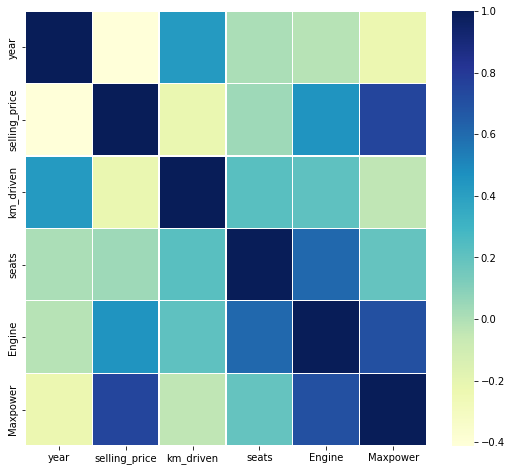

In [20]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [21]:
import plotly.express as px
fig = px.histogram(df, 
                   x='selling_price', 
                   marginal='box', 
                   color='fuel', 
                  
                  
                   
                    
                 )
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig2 = px.histogram(df, 
                   x='selling_price', 
                   marginal='box', 
                   color='transmission', 
                  
                  
                   
                    
                 )
fig2.update_layout(bargap=0.1)
fig2.show()

In [23]:
'''sellertype transmission owner'''
df['Mlg'] = df['Mlg'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   torque         7906 non-null   object 
 10  seats          7906 non-null   float64
 11  Mlg            7906 non-null   float64
 12  Engine         7906 non-null   int64  
 13  Maxpower       7906 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 926.5+ KB


In [24]:
for c in df.columns:
  print(c,df[c].isnull().sum())

name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
mileage 0
torque 0
seats 0
Mlg 0
Engine 0
Maxpower 0


In [69]:
fig3 = px.histogram(df, 
                   x='selling_price', 
                   marginal='box', 
                   color='seller_type', 
                  
                  
                   
                    
                 )
fig3.update_layout(bargap=0.1)
fig3.show()

In [26]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'torque', 'seats', 'Mlg', 'Engine',
       'Maxpower'],
      dtype='object')

***Selecting the input columns and Classifying inputs as numeric and categorical ***

In [27]:
numeric_cols=['year', 'km_driven', 'Mlg', 'Engine','Maxpower','seats']
categoricalcols=['fuel', 'seller_type', 'transmission', 'owner']
target=['selling_price']

**MinMaxScaling is applied to numeric inputs**

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols]=scaler.transform(df[numeric_cols])

In [29]:
df.describe()

,year,selling_price,km_driven,seats,Mlg,Engine,Maxpower
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,0.231387,6.498137e+05,0.029311,0.284699,0.462378,0.280104,0.160096
std,0.148604,8.135827e+05,0.024060,0.079934,0.096102,0.169092,0.097351
min,0.000000,2.999900e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115385,2.700000e+05,0.014827,0.250000,0.399524,0.192282,0.095997
50%,0.192308,4.500000e+05,0.025418,0.250000,0.459524,0.209396,0.133987
75%,0.307692,6.900000e+05,0.040426,0.250000,0.531429,0.321477,0.188453
max,1.000000,1.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000


**Categorical inputs are One hot encoded**

In [30]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit(df[categoricalcols])
encoded_cols=list(enc.get_feature_names(categoricalcols))
df[encoded_cols]=enc.transform(df[categoricalcols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [31]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'torque', 'seats', 'Mlg', 'Engine',
       'Maxpower', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [32]:
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,0.230769,450000,0.061640,Diesel,Individual,Manual,First Owner,23.4 kmpl,190Nm@ 2000rpm,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,0.230769,370000,0.050837,Diesel,Individual,Manual,Second Owner,21.14 kmpl,250Nm@ 1500-2500rpm,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,0.538462,158000,0.059310,Petrol,Individual,Manual,Third Owner,17.7 kmpl,"12.7@ 2,700(kgm@ rpm)",...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,0.384615,225000,0.053803,Diesel,Individual,Manual,First Owner,23.0 kmpl,22.4 kgm at 1750-2750rpm,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Maruti Swift VXI BSIII,0.500000,130000,0.050837,Petrol,Individual,Manual,First Owner,16.1 kmpl,"11.5@ 4,500(kgm@ rpm)",...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,0.269231,320000,0.046601,Petrol,Individual,Manual,First Owner,18.5 kmpl,113.7Nm@ 4000rpm,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8124,Hyundai Verna CRDi SX,0.500000,135000,0.050414,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,"24@ 1,900-2,750(kgm@ rpm)",...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8125,Maruti Swift Dzire ZDi,0.423077,382000,0.050837,Diesel,Individual,Manual,First Owner,19.3 kmpl,190Nm@ 2000rpm,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8126,Tata Indigo CR4,0.269231,290000,0.010591,Diesel,Individual,Manual,First Owner,23.57 kmpl,140Nm@ 1800-3000rpm,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [46]:
print(encoded_cols)


['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']


**Here preprocessing is complete. The raw dataframe is now splitted into train validate and test dataframes as 60% 20% 20% **

In [33]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=9)

In [36]:
train_df.shape

(4743, 28)

In [37]:
test_df.shape

(1582, 28)

In [38]:
val_df.shape

(1581, 28)

Linear regression 

In [70]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(np.asanyarray(train_df[numeric_cols+encoded_cols]),np.asanyarray(train_df[target]),sample_weight=None)
print(regr.score(np.asanyarray(val_df[numeric_cols+encoded_cols]),np.asanyarray(val_df[target]),sample_weight=None))

0.6659844449562953


The model is tunned by  deleting some of the attributes from inputs.

In [61]:
numeric_cols2=['year', 'km_driven', 'Mlg', 'Engine','Maxpower']
encoded_cols2=['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual']

regr=LinearRegression()
regr.fit(np.asanyarray(train_df[numeric_cols2+encoded_cols2]),np.asanyarray(train_df[target]),sample_weight=None)

LinearRegression()

In [62]:
print(regr.score(np.asanyarray(val_df[numeric_cols2+encoded_cols2]),np.asanyarray(val_df[target]),sample_weight=None))

0.662636739140153


In [67]:
print(regr.score(np.asanyarray(test_df[numeric_cols2+encoded_cols2]),np.asanyarray(test_df[target]),sample_weight=None))

0.6965577945012188


The results are slightly better.
Another model is build using Decision Trees.Tunned inputs are applied to this model

In [65]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(np.asanyarray(train_df[numeric_cols2+encoded_cols2]),np.asanyarray(train_df[target]))

DecisionTreeRegressor(random_state=0)

In [66]:
print(regressor.score(np.asanyarray(val_df[numeric_cols2+encoded_cols2]),np.asanyarray(val_df[target]),sample_weight=None))

0.9510637283552984


In [68]:
print(regressor.score(np.asanyarray(test_df[numeric_cols2+encoded_cols2]),np.asanyarray(test_df[target]),sample_weight=None))

0.9570699648026205


Thus it can be concluded that DecisionTrees produce the best results for the given dataset. 

Best possible R2 score : 0.957